# PHYS650: Homework 3
AERONET Data Analysis

### What is AERONET? 
The AERONET (AErosol RObotic NETwork) program is a federation of ground- based remote sensing aerosol networks collaborated on by national agencies, 
institutes, universities, individual scientists, and partners.
The program provides a long-term, continuous and readily accessible public 
domain database of aerosol optical depth, microphysical and radiative 
properties for aerosol research and characterization, validation of satellite 
retrievals, and synergism with other databases. 


AERONET collaboration provides globally distributed observations of:
- spectral aerosol optical depth (AOD)
- inversions
- precipitable water
The network imposes standardization of instruments, calibration, 
processing and distribution. 
Aerosol optical depth data are computed for three data quality levels: 
- Level 1.0 (unscreened)
- Level 1.5 (cloud-screened)
- Level 2.0 (cloud screened and quality-assured)

---
### 1) You will analyze AERONET data from two sites: https://aeronet.gsfc.nasa.gov/cgi-bin/bamgomas_interactive Plot (or copy image) and analyze AOD and Angstrom exponent for 2021 at these two sites. Briefly  describe similarities and explain differences in aerosol properties measured at these two sites. HINT: Take a look at other AERONET aerosol products.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools

---
### CCNY vs GSFC AERONET May 18 - 22, 2021

### Using AERONET Level 1.5 (Cloud Screened) AOD and Angstrom Exponent data.
---

Importing the date using pandas read_csv function. Data is comma delimited and the first 6 rows are headers. 

In [2]:
GSFC = pd.read_csv(r"20210501_20210531_GSFC.lev15", sep=",", skiprows=6)
CCNY = pd.read_csv(r"20210501_20210531_CCNY.lev15", sep=",", skiprows=6)

Just to see what these dataframes look like I'll use a df.head(10) to print out the first 10 lines of GSFC. 

In [3]:
GSFC.head(10)

,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,...,Exact_Wavelengths_of_AOD(um)_380nm,Exact_Wavelengths_of_AOD(um)_340nm,Exact_Wavelengths_of_PW(um)_935nm,Exact_Wavelengths_of_AOD(um)_681nm,Exact_Wavelengths_of_AOD(um)_709nm,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty.1,Exact_Wavelengths_of_AOD(um)_Empty.2,Exact_Wavelengths_of_AOD(um)_Empty.3,Exact_Wavelengths_of_AOD(um)_Empty.4
0,01:05:2021,10:59:40,121,121.458102,0.009996,0.020338,0.023915,-999.0,-999.0,0.031872,...,0.3798,0.3399,0.9375,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,01:05:2021,11:03:01,121,121.460428,0.010369,0.020816,0.024320,-999.0,-999.0,0.032234,...,0.3798,0.3399,0.9375,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,01:05:2021,11:05:09,121,121.461910,0.010056,0.020391,0.023840,-999.0,-999.0,0.031712,...,0.3798,0.3399,0.9375,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,01:05:2021,11:07:07,121,121.463275,0.010025,0.020465,0.023813,-999.0,-999.0,0.031538,...,0.3798,0.3399,0.9375,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,01:05:2021,11:10:09,121,121.465382,0.010838,0.021180,0.024750,-999.0,-999.0,0.032514,...,0.3798,0.3399,0.9375,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
5,01:05:2021,11:12:05,121,121.466725,0.010821,0.021270,0.024558,-999.0,-999.0,0.032284,...,0.3798,0.3399,0.9375,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
6,01:05:2021,11:15:09,121,121.468854,0.010776,0.021115,0.024459,-999.0,-999.0,0.032191,...,0.3798,0.3399,0.9375,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
7,01:05:2021,11:17:05,121,121.470197,0.010697,0.021021,0.024546,-999.0,-999.0,0.032144,...,0.3798,0.3399,0.9375,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
8,01:05:2021,11:20:09,121,121.472326,0.011068,0.021279,0.024843,-999.0,-999.0,0.032324,...,0.3798,0.3399,0.9375,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
9,01:05:2021,11:23:53,121,121.474919,0.011355,0.021609,0.025186,-999.0,-999.0,0.032721,...,0.3798,0.3399,0.9375,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


I'd like to use a datetime axis in this analysis so I'll need to create one. This is a little tricky because of the way AERONET records time, but I figured out the folowing.  

In [4]:
def AERONET_Datetime(df): 
    df["Datetime"] = pd.to_datetime([(f"{df.iloc[i, 0]}" + str(df.iloc[i, 1])) for i in range(len(df))], format="%d:%m:%Y%H:%M:%S")
    df.set_index(["Datetime"], inplace=True)
    return df

GSFC = AERONET_Datetime(GSFC); GSFC = GSFC["2021-05-18":"2021-05-21"]
CCNY = AERONET_Datetime(CCNY); CCNY = CCNY["2021-05-18":"2021-05-21"]

Now lets handle these columns...

In [5]:
columns = GSFC.columns.to_list()
for i in np.arange(0, len(columns)): print(f"({i}) {columns[i]}")

(0) Date(dd:mm:yyyy)
(1) Time(hh:mm:ss)
(2) Day_of_Year
(3) Day_of_Year(Fraction)
(4) AOD_1640nm
(5) AOD_1020nm
(6) AOD_870nm
(7) AOD_865nm
(8) AOD_779nm
(9) AOD_675nm
(10) AOD_667nm
(11) AOD_620nm
(12) AOD_560nm
(13) AOD_555nm
(14) AOD_551nm
(15) AOD_532nm
(16) AOD_531nm
(17) AOD_510nm
(18) AOD_500nm
(19) AOD_490nm
(20) AOD_443nm
(21) AOD_440nm
(22) AOD_412nm
(23) AOD_400nm
(24) AOD_380nm
(25) AOD_340nm
(26) Precipitable_Water(cm)
(27) AOD_681nm
(28) AOD_709nm
(29) AOD_Empty
(30) AOD_Empty.1
(31) AOD_Empty.2
(32) AOD_Empty.3
(33) AOD_Empty.4
(34) Triplet_Variability_1640
(35) Triplet_Variability_1020
(36) Triplet_Variability_870
(37) Triplet_Variability_865
(38) Triplet_Variability_779
(39) Triplet_Variability_675
(40) Triplet_Variability_667
(41) Triplet_Variability_620
(42) Triplet_Variability_560
(43) Triplet_Variability_555
(44) Triplet_Variability_551
(45) Triplet_Variability_532
(46) Triplet_Variability_531
(47) Triplet_Variability_510
(48) Triplet_Variability_500
(49) Triplet_V

Wow 113 columns is so many... I'll need to cut that down into what's important for this analysis. 

I'd like to keep the following columns:

In [6]:
columns = ['AOD_340nm',
           'AOD_380nm',
           'AOD_440nm',
           'AOD_532nm',
           "AOD_675nm",
           'AOD_709nm',
           "AOD_870nm", 
           "AOD_1020nm", 
           "AOD_1640nm", 
           '380-500_Angstrom_Exponent',
           '440-675_Angstrom_Exponent',
           '500-870_Angstrom_Exponent',
           'Data_Quality_Level',
           'AERONET_Instrument_Number',
           'AERONET_Site_Name',
           'Site_Latitude(Degrees)',
           'Site_Longitude(Degrees)']

def AERONET_reduce(df):
    df = df.filter(columns)
    df.replace(-999, np.nan, inplace=True)
    return df

GSFC = AERONET_reduce(GSFC)
CCNY = AERONET_reduce(CCNY)

---
#### Aerosol Optical Depth (AOD or $\tau$)

AOD is the integral of light extention by aerososl withing the atmoshperic column. 

It is related to the size distribution of the aersols. I

Large AOD is related to thicker layer, or clouds. 

In [7]:
def AERONET_dict(df):
    AOD = df.filter(like='AOD_') # Get only columns starting with AOD
    AOD = AOD.resample("30T").mean() # Get only columns starting with AOD
    
    Ang = df.filter(like='_Angstrom_Exponent') # Get only columns ending with _Angstrom_Exponent
    Ang = Ang.resample("30T").mean() # Get only columns starting with AOD
    
    Info = df.filter(items = columns[-5::]).iloc[0]
    Info.head()
    
    return {"AOD": AOD, "Ang":Ang, "Info":Info}

GSFC = AERONET_dict(GSFC)
CCNY = AERONET_dict(CCNY)

In [15]:
def AERONET_plot_AODvsAOD(AOD1, AOD2, Info1, Info2):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

    markers = itertools.cycle(('o', 'v', 's', 'd', '*')) 
    
    ### ------- Axis 1 ------- ### 
    for col in AOD1.columns:
        ax1.plot(AOD1.index, AOD1[col], label=f"{col}", linestyle='--', marker = next(markers))
    
    box = ax1.get_position()
    ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    ax1.title.set_text(Info1.to_string())
    
    ### ------- Axis 2 ------- ### 
    for col in AOD2.columns:
        ax2.plot(AOD2.index, AOD2[col], label=f"{col}", linestyle='--', marker = next(markers))

    box = ax2.get_position()
    ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax2.title.set_text(Info2.to_string())
                  
    fig.tight_layout()
    # set the spacing between subplots
    plt.subplots_adjust(wspace=0.4)
    
    plt.show()
    return

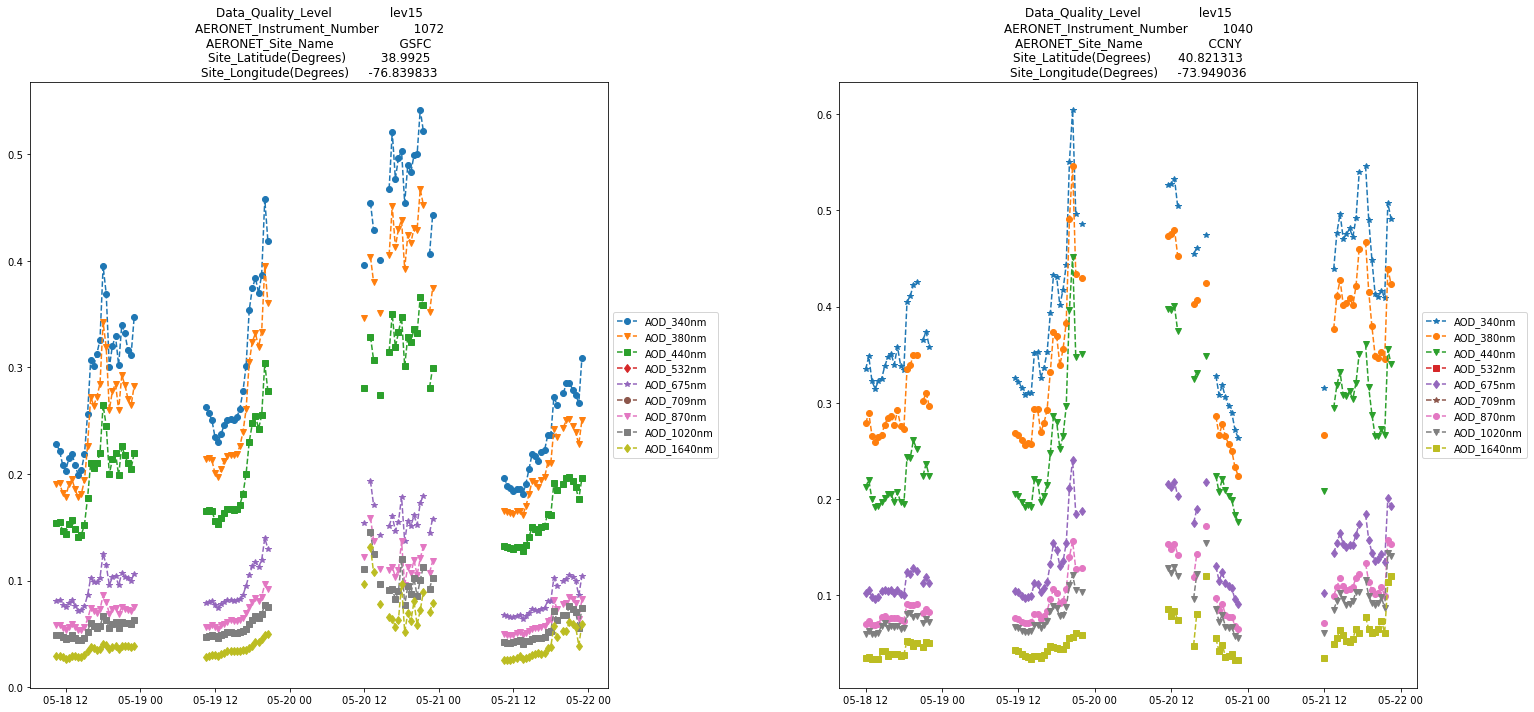

In [16]:
AERONET_plot_AODvsAOD(GSFC["AOD"], CCNY["AOD"], GSFC["Info"], CCNY["Info"])

---
#### Angstrom Exponent

TheÅngström Exponent (denoted as AE or α) is a measure of the spectral dependence of AOD.

It is related to particl size in that: values less that 1 suggest an dominance by coarse particles (e.g. dust, ash, sea spray), while values greater than 1 signal fine particls (e.g. smoke, industrical pollution).

## $\tau = \tau_{\lambda_o}(\lambda / \lambda_o)^{-\alpha}$

In [ ]:
def AERONET_plot_AngvsAng(Ang1, Ang2, Info1, Info2):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

    markers = itertools.cycle(('o', 'v', 's', 'd', '*')) 
    
    ### ------- Axis 1 ------- ### 
    for col in Ang1.columns:
        ax1.plot(Ang1.index, Ang1[col], label=f"{col}", linestyle='--', marker = next(markers))
    
    box = ax1.get_position()
    ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    ax1.title.set_text(Info1.to_string())
    
    ### ------- Axis 2 ------- ### 
    for col in Ang2.columns:
        ax2.plot(Ang2.index, Ang2[col], label=f"{col}", linestyle='--', marker = next(markers))

    box = ax2.get_position()
    ax2.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax2.title.set_text(Info2.to_string())
                  
    fig.tight_layout()
    # set the spacing between subplots
    plt.subplots_adjust(wspace=0.4)
    
    plt.show()
    return